In [59]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#### Data Exploration

In [61]:
# Build dataframe
pd.options.display.float_format = '{:,.2f}'.format

house_data = pd.read_csv('Data/housing_data.csv')
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313,000.00",3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"2,384,000.00",5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"342,000.00",3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"420,000.00",3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"550,000.00",4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,"308,166.67",3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,"534,333.33",3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,"416,904.17",3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,"203,400.00",4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [62]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [63]:
#print(house_data.date.value_counts())  # drop
#print(house_data.street.value_counts()) # drop
#print(house_data.city.value_counts()) # drop
#print(house_data.statezip.value_counts()) # check, maybe drop
#print(house_data.country.value_counts()) # All USA. drop

#house_data.replace({'statezip': r'\s[0-9]*'}, '', regex=True, inplace=True)
#house_data.statezip.value_counts() # All WA. drop

# Save the city and zip in case we want to work with it later
house_city = house_data.city
house_zip = house_data.replace({'statezip': r'WA\s'}, '', regex=True).statezip

house_data.drop(columns=['date', 'condition', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'], inplace=True)
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,"313,000.00",3.00,1.50,1340,7912,1.50,0,0,1340,0
1,"2,384,000.00",5.00,2.50,3650,9050,2.00,0,4,3370,280
2,"342,000.00",3.00,2.00,1930,11947,1.00,0,0,1930,0
3,"420,000.00",3.00,2.25,2000,8030,1.00,0,0,1000,1000
4,"550,000.00",4.00,2.50,1940,10500,1.00,0,0,1140,800
...,...,...,...,...,...,...,...,...,...,...
4595,"308,166.67",3.00,1.75,1510,6360,1.00,0,0,1510,0
4596,"534,333.33",3.00,2.50,1460,7573,2.00,0,0,1460,0
4597,"416,904.17",3.00,2.50,3010,7014,2.00,0,0,3010,0
4598,"203,400.00",4.00,2.00,2090,6630,1.00,0,0,1070,1020


In [64]:
# Bedrooms to sqft_living ratio
house_data['bed_living_ratio'] = house_data.bedrooms / house_data.sqft_living

# Bedrooms to sqft_lot ratio
house_data['bed_lot_ratio'] = house_data.bedrooms / house_data.sqft_lot

# sqft_lot to sqft_living ratio
house_data['lot_living_ratio'] = house_data.sqft_lot / house_data.sqft_living

# Bedrooms to actual_residence
house_data['bed_ll_ratio'] = house_data.bedrooms / house_data.lot_living_ratio

house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,bed_living_ratio,bed_lot_ratio,lot_living_ratio,bed_ll_ratio
0,"313,000.00",3.00,1.50,1340,7912,1.50,0,0,1340,0,0.00,0.00,5.90,0.51
1,"2,384,000.00",5.00,2.50,3650,9050,2.00,0,4,3370,280,0.00,0.00,2.48,2.02
2,"342,000.00",3.00,2.00,1930,11947,1.00,0,0,1930,0,0.00,0.00,6.19,0.48
3,"420,000.00",3.00,2.25,2000,8030,1.00,0,0,1000,1000,0.00,0.00,4.01,0.75
4,"550,000.00",4.00,2.50,1940,10500,1.00,0,0,1140,800,0.00,0.00,5.41,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,"308,166.67",3.00,1.75,1510,6360,1.00,0,0,1510,0,0.00,0.00,4.21,0.71
4596,"534,333.33",3.00,2.50,1460,7573,2.00,0,0,1460,0,0.00,0.00,5.19,0.58
4597,"416,904.17",3.00,2.50,3010,7014,2.00,0,0,3010,0,0.00,0.00,2.33,1.29
4598,"203,400.00",4.00,2.00,2090,6630,1.00,0,0,1070,1020,0.00,0.00,3.17,1.26


In [65]:
## Split data into training and test data
from sklearn.model_selection import train_test_split

x = house_data.drop(['price'], axis=1)
y = house_data.price

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [67]:
train_data = x_train.join(y_train)
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,bed_living_ratio,bed_lot_ratio,lot_living_ratio,bed_ll_ratio,price
435,5.00,1.75,2320,8100,1.00,0,0,1160,1160,0.00,0.00,3.49,1.43,"315,000.00"
4294,4.00,1.75,1520,7700,1.00,0,0,1520,0,0.00,0.00,5.07,0.79,"499,950.00"
2077,4.00,2.50,1780,4169,2.00,0,0,1780,0,0.00,0.00,2.34,1.71,"540,000.00"
615,3.00,2.00,1530,5401,1.00,0,0,1530,0,0.00,0.00,3.53,0.85,"570,000.00"
3462,4.00,2.50,2480,16360,1.00,0,0,1510,970,0.00,0.00,6.60,0.61,"560,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,4.00,3.00,3720,57499,1.00,0,0,1880,1840,0.00,0.00,15.46,0.26,"650,000.00"
4436,2.00,1.00,1000,4776,1.00,0,0,1000,0,0.00,0.00,4.78,0.42,"247,875.00"
3552,3.00,1.75,1400,6300,1.00,0,0,1400,0,0.00,0.00,4.50,0.67,"235,000.00"
3598,3.00,2.75,2600,64626,1.50,0,0,2600,0,0.00,0.00,24.86,0.12,"415,000.00"


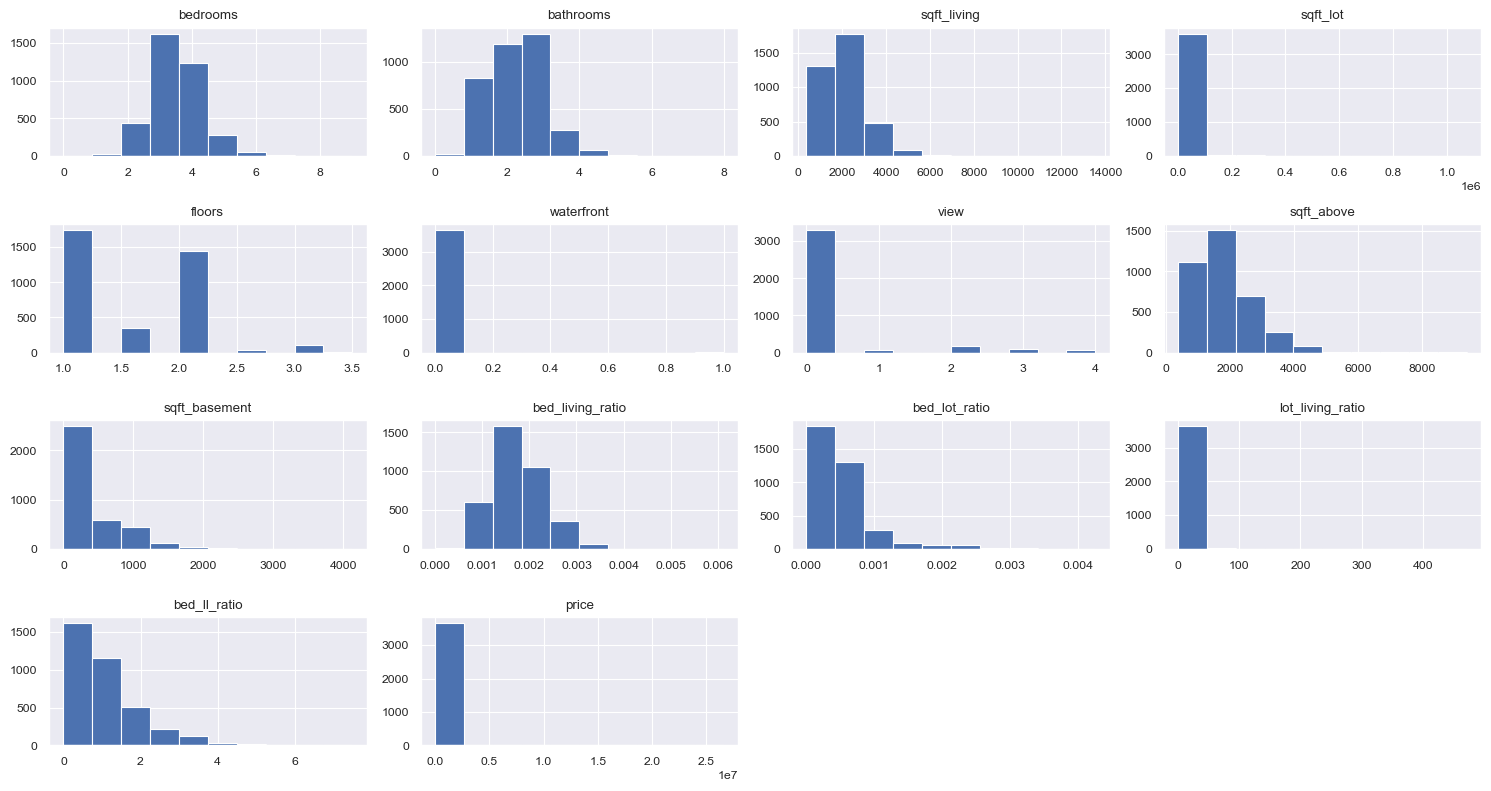

In [68]:
train_data.hist(figsize=(15, 8))
plt.tight_layout()

In [69]:
## Look at the correlation with the target variable - Heatmap to visualize the correlation matrix

train_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,bed_living_ratio,bed_lot_ratio,lot_living_ratio,bed_ll_ratio,price
bedrooms,1.00,0.55,0.59,0.09,0.17,-0.01,0.11,0.48,0.33,-0.01,0.00,-0.04,0.34,0.18
bathrooms,0.55,1.00,0.76,0.12,0.49,0.05,0.21,0.69,0.28,-0.53,0.10,-0.07,0.42,0.30
sqft_living,0.59,0.76,1.00,0.23,0.35,0.09,0.30,0.88,0.43,-0.70,-0.18,-0.00,0.24,0.39
sqft_lot,0.09,0.12,0.23,1.00,0.01,0.01,0.07,0.23,0.06,-0.16,-0.28,0.87,-0.26,0.05
floors,0.17,0.49,0.35,0.01,1.00,0.03,0.03,0.52,-0.26,-0.32,0.45,-0.09,0.53,0.14
waterfront,-0.01,0.05,0.09,0.01,0.03,1.00,0.36,0.06,0.06,-0.07,-0.06,0.02,-0.03,0.11
view,0.11,0.21,0.30,0.07,0.03,0.36,1.00,0.16,0.32,-0.23,-0.07,0.04,0.07,0.21
sqft_above,0.48,0.69,0.88,0.23,0.52,0.06,0.16,1.00,-0.05,-0.63,-0.18,0.02,0.18,0.34
sqft_basement,0.33,0.28,0.43,0.06,-0.26,0.06,0.32,-0.05,1.00,-0.28,-0.04,-0.04,0.17,0.18
bed_living_ratio,-0.01,-0.53,-0.70,-0.16,-0.32,-0.07,-0.23,-0.63,-0.28,1.00,0.18,0.00,-0.12,-0.28


<Axes: >

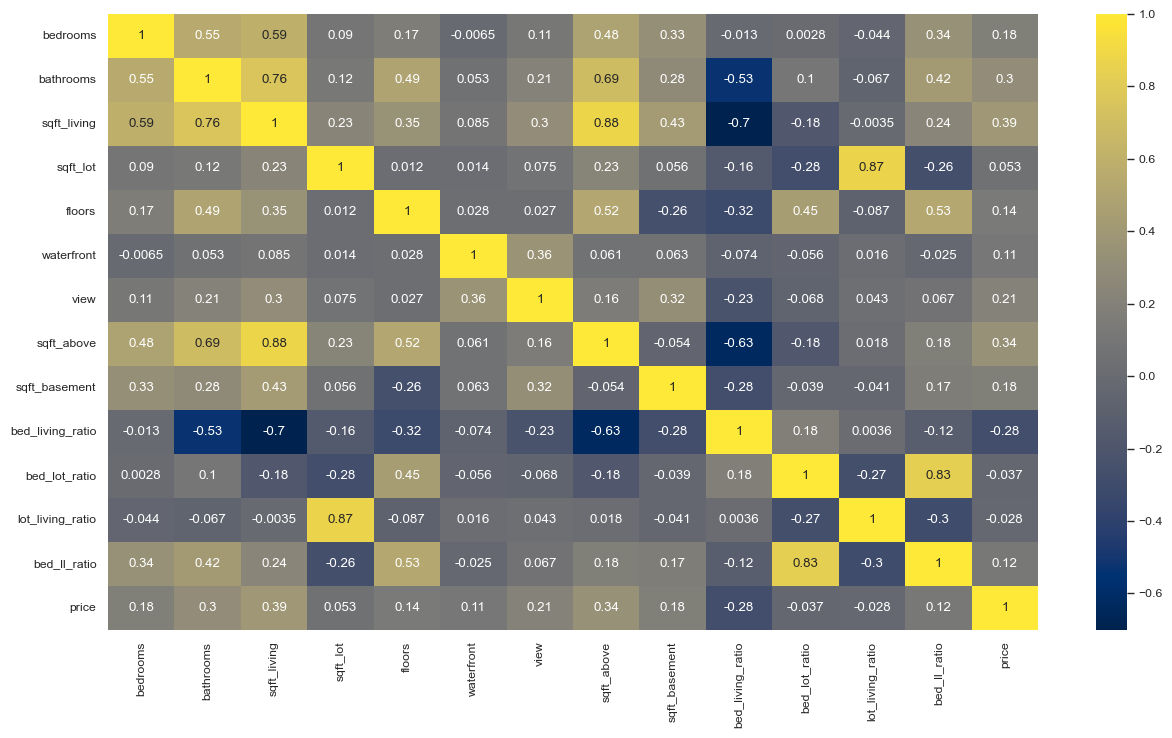

In [70]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='cividis')

# sqft_lot and sqft_living correlate strongly with the price. Same with sqft_above and condition
# yr_renovated has a negative correlation with price

In [71]:
### Data Preprocessing and Feature Engineering
# Take the logarithm of features and look at the distribution

# bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_renovated
# prev 0 values by adding 1

train_data.bathrooms = np.log(train_data.bathrooms + 1)
train_data.sqft_living = np.log(train_data.sqft_living + 1)
train_data.sqft_lot = np.log(train_data.sqft_lot + 1)
train_data.floors = np.log(train_data.floors + 1)
train_data.waterfront = np.log(train_data.waterfront + 1)
train_data.view = np.log(train_data.view + 1)
train_data.sqft_above = np.log(train_data.sqft_above + 1)
train_data.sqft_basement = np.log(train_data.sqft_basement + 1)

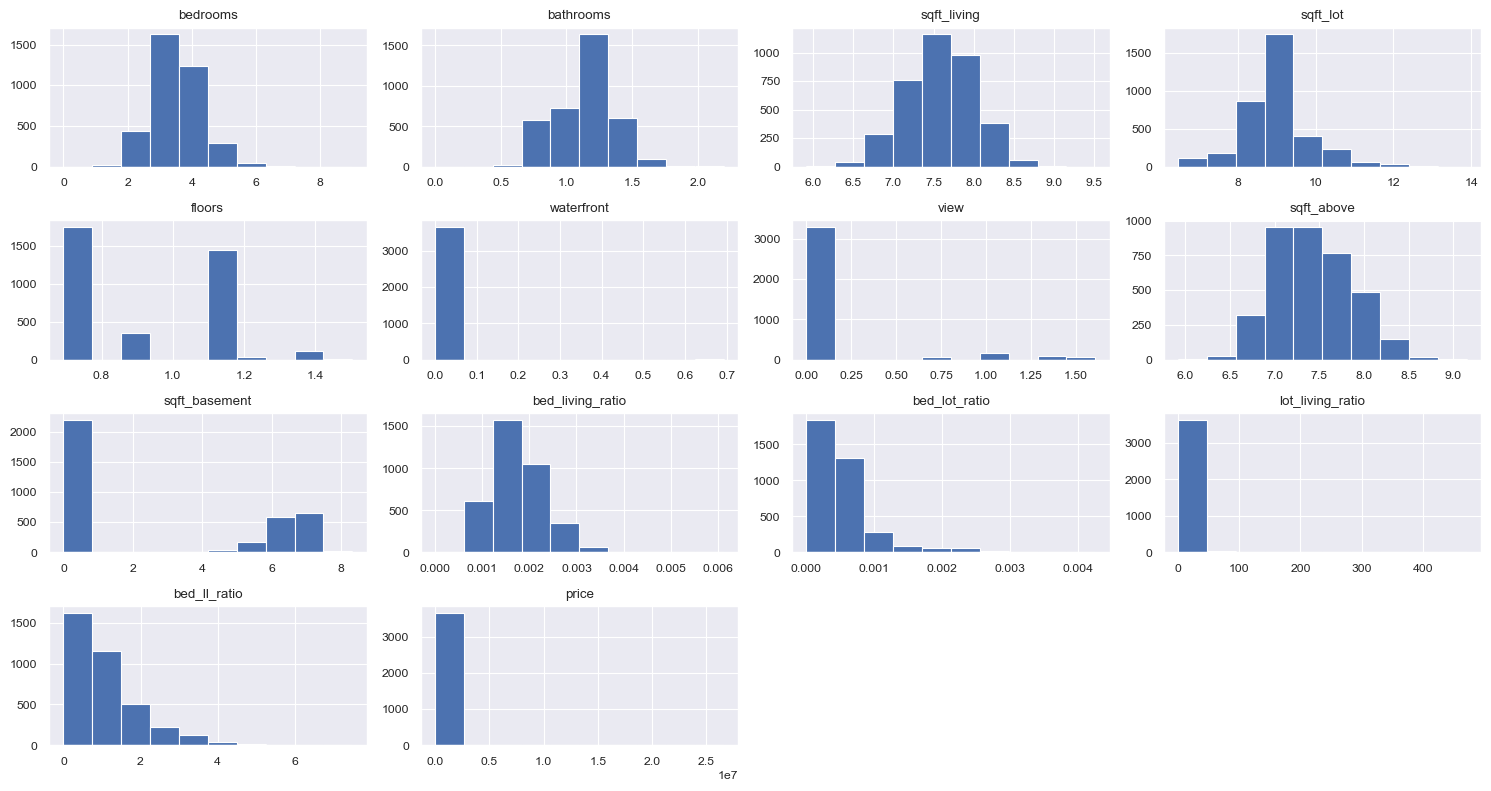

In [72]:
train_data.hist(figsize=(15, 8))
plt.tight_layout()

<Axes: xlabel='bedrooms', ylabel='sqft_above'>

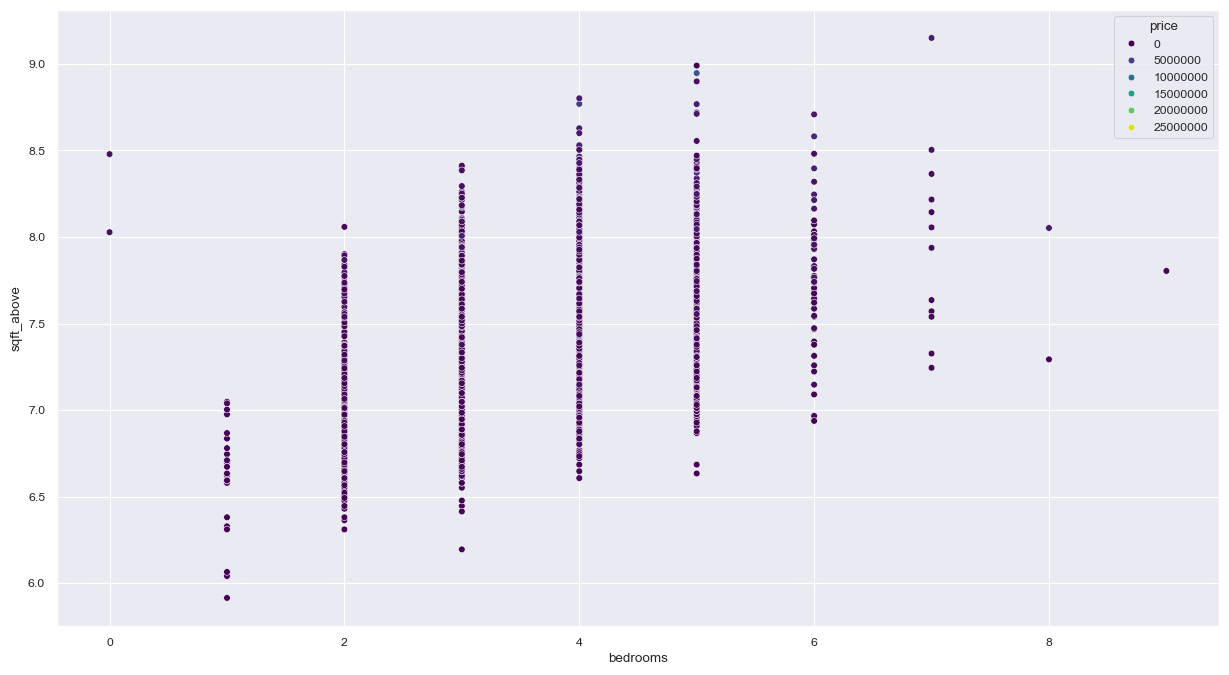

In [73]:
# Visualize some points
sns.set_theme()
sns.set_context('paper')
plt.figure(figsize=(15,8))
sns.scatterplot(x='bedrooms', y='sqft_above', hue='price', data=train_data, palette='viridis')

# Meaningless, but practice

In [74]:
### Train Models

In [75]:
## Linear Regression
# No hyperparameter tuning
from sklearn.linear_model import LinearRegression

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [76]:
test_data = x_test.join(y_test)

test_data.bathrooms = np.log(test_data.bathrooms + 1)
test_data.sqft_living = np.log(test_data.sqft_living + 1)
test_data.sqft_lot = np.log(test_data.sqft_lot + 1)
test_data.floors = np.log(test_data.floors + 1)
test_data.waterfront = np.log(test_data.waterfront + 1)
test_data.view = np.log(test_data.view + 1)
test_data.sqft_above = np.log(test_data.sqft_above + 1)
test_data.sqft_basement = np.log(test_data.sqft_basement + 1)

x_text = test_data.drop(['price'], axis=1)
y_test = test_data['price']

In [77]:
# Scale the test data
x_test_s = scaler.transform(x_test)

In [78]:
reg.score(x_test_s, y_test)

# Poor model prediction

0.569610414653916

In [79]:
### Random Forest
# Find an optimal model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [80]:
forest.score(x_test_s, y_test)

0.3539147065998385

In [81]:
# Grid search with k-fold cross validation
# Get the optimal model with the best estimator/best regressor
# Use it to score the best regressor against the test data
from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()

# Hyperparameter tuning
param_grid = {
    #'n_estimators': [3, 10, 30],
    'n_estimators': [350],
    #'max_features': [2, 5, 8, 10],
    'min_samples_split': [6],
    'max_depth': [2],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2], 'min_samples_split': [6],
                         'n_estimators': [300, 350, 400, 450]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
best_forest = grid_search.best_estimator_

In [87]:
best_forest

RandomForestRegressor(max_depth=2, min_samples_split=6, n_estimators=350)

In [88]:
best_forest.score(x_test_s, y_test)

0.506118726123115

In [89]:
#### Thoughts on comparisons
# The "optimal" parameters found with the Random Forest Classifier yielded lower predictive results compared to the Linear Regression Model
# At this point in time, I am unsure of the cause. 
# The dataset itself shows a weak linear correlatin between features
# Possible models to use for future scenarios can be a Polynomial Regression Model or a Support Vector Classifier Model

In [85]:
# What next?

# Improve the quality of the model
# Engineer different features
# Drop different features


# Support Vector Classifier
# Simple Decision Tree
# Train a neural network